## 1. Introduction

This notebook performs an Exploratory Data Analysis (EDA) on a domain-specific
Question Answering (QA) dataset. The objective is to understand the structure,
distribution, and textual characteristics of the data before using it for
downstream NLP or machine learning tasks.

The analysis focuses on:
- Dataset structure and completeness
- Category-wise distribution of questions
- Answer type patterns
- Text-based complexity analysis using question length

## 2. Import Libraries & Load Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
ds= pd.read_csv(r"C:\Users\Isha\Desktop\Projects\EDA\DSQA-full.csv")
print(ds.head())

                                             problem       problem_category  \
0  Consider the OECD countries whose total popula...  Politics & Government   
1  There is a MMORPG game that was rumoured to ha...  Media & Entertainment   
2  Name the two songs that went viral on TikTok b...  Media & Entertainment   
3  I'd like you to analyze the top five universit...              Education   
4  Of the countries that were part of the top 10 ...              Geography   

                                              answer    answer_type  
0                                        New Zealand  Single Answer  
1                          Combat, Skilling, Utility     Set Answer  
2  I Can't Handle Change (2010), Christmas Kids (...     Set Answer  
3           Autonomous University of San Luis Potosí  Single Answer  
4                    Austria, Switzerland, Singapore     Set Answer  


## 3. Dataset Overview

Questions Answered:

--How many rows and columns are present?

--What are the column data types?

--Is the dataset clean?

In [ ]:
ds.shape

#900 questions

(900, 4)

In [18]:
ds.info

<bound method DataFrame.info of                                                problem       problem_category  \
0    Consider the OECD countries whose total popula...  Politics & Government   
1    There is a MMORPG game that was rumoured to ha...  Media & Entertainment   
2    Name the two songs that went viral on TikTok b...  Media & Entertainment   
3    I'd like you to analyze the top five universit...              Education   
4    Of the countries that were part of the top 10 ...              Geography   
..                                                 ...                    ...   
895  Using official UK government sources, find the...  Politics & Government   
896  For the year ended December 2023, among Domino...    Finance & Economics   
897  List all of the bigger (i.e., with a populatio...                 Health   
898  According to the ACS 5-year estimates subject ...              Geography   
899  List all the years from 2015 to 2021 that the ...                Science

In [19]:
ds.describe(include="object")

,problem,problem_category,answer,answer_type
count,900,900,896,900
unique,900,17,863,2
top,List all the years from 2015 to 2021 that the ...,Politics & Government,Canada,Set Answer
freq,1,148,4,584


## 4. Missing Value Analysis
Questions Answered:

--Are there missing values?

--How significant is the missing data?

*The dataset contains very few missing values, indicating high data quality
and minimal preprocessing requirements.

In [21]:
missing_values= ds.isnull().sum()
print(missing_values)

problem             0
problem_category    0
answer              4
answer_type         0
dtype: int64


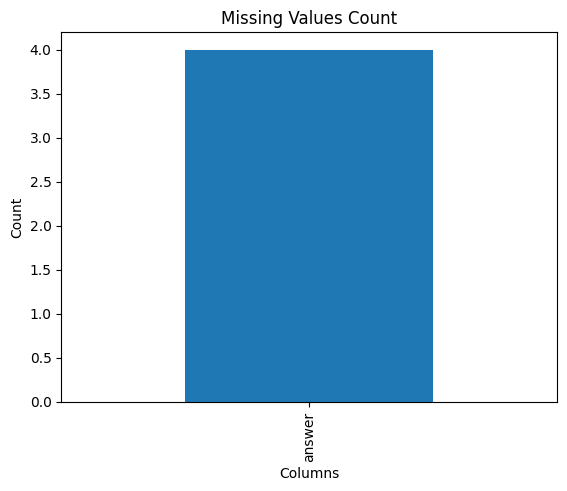

In [22]:
missing_values[missing_values > 0].plot(
    kind="bar",
    title="Missing Values Count",
    ylabel="Count",
    xlabel="Columns"
)
plt.show()

In [23]:
ds.dropna()

,problem,problem_category,answer,answer_type
0,Consider the OECD countries whose total popula...,Politics & Government,New Zealand,Single Answer
1,There is a MMORPG game that was rumoured to ha...,Media & Entertainment,"Combat, Skilling, Utility",Set Answer
2,Name the two songs that went viral on TikTok b...,Media & Entertainment,"I Can't Handle Change (2010), Christmas Kids (...",Set Answer
3,I'd like you to analyze the top five universit...,Education,Autonomous University of San Luis Potosí,Single Answer
4,Of the countries that were part of the top 10 ...,Geography,"Austria, Switzerland, Singapore",Set Answer
...,...,...,...,...
895,"Using official UK government sources, find the...",Politics & Government,"Kerry McCarthy: University of Liverpool, City ...",Set Answer
896,"For the year ended December 2023, among Domino...",Finance & Economics,Wingstop Inc.,Single Answer
897,"List all of the bigger (i.e., with a populatio...",Health,"Corona, Murrieta, Temecula",Set Answer
898,According to the ACS 5-year estimates subject ...,Geography,50 to 54 years,Single Answer


## 5. Problem Category Distribution
Questions Answered:

--Which domains are most common?

--Is the dataset balanced across categories?

**The dataset is not evenly distributed across categories.
Certain domains such as Politics & Government  dominate the dataset,
which could introduce bias in model training.

In [ ]:
category_counts = ds["problem_category"].value_counts()

category_counts

problem_category
Politics & Government    148
Finance & Economics      132
Geography                 95
Education                 94
Health                    92
Science                   90
Other                     65
History                   44
Travel                    36
Media & Entertainment     29
Arts                      26
Technology                22
Sports                    20
Current Events             3
Biology                    2
Linguistics                1
Arts & Entertainment       1
Name: count, dtype: int64

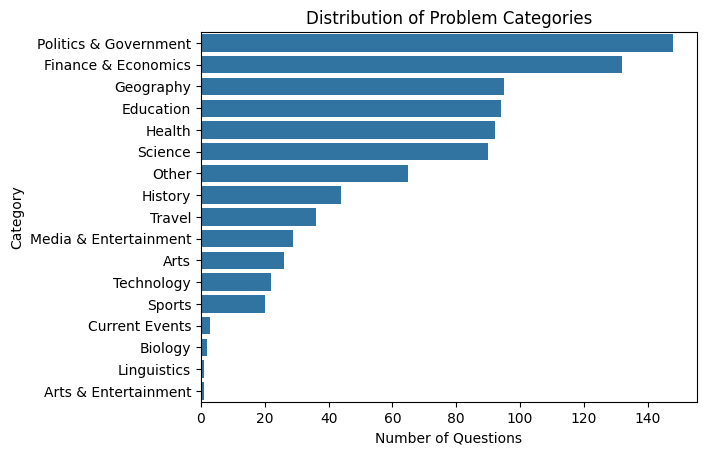

In [26]:
sns.barplot(
    y=category_counts.index,
    x=category_counts.values
)
plt.title("Distribution of Problem Categories")
plt.xlabel("Number of Questions")
plt.ylabel("Category")
plt.show()

## 6. Answer Type Distribution
Questions Answered:

--Do most questions have single or multiple answers?

In [27]:
answer_type_counts = ds["answer_type"].value_counts()
answer_type_counts

answer_type
Set Answer       584
Single Answer    316
Name: count, dtype: int64

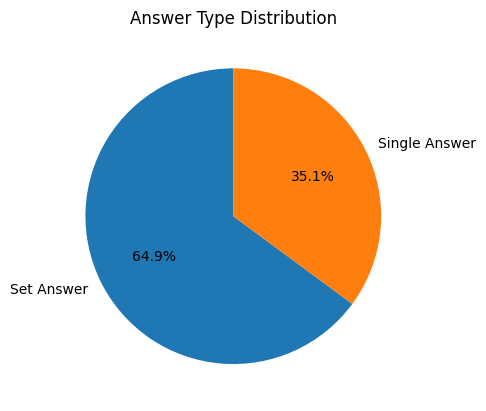

In [28]:
answer_type_counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    title="Answer Type Distribution"
)
plt.ylabel("")
plt.show()


## 7. Category vs Answer Type (Stacked Analysis)
Questions Answered:

--Do certain categories prefer set-based answers?

In [29]:
category_answer_type = pd.crosstab(
    ds["problem_category"],
    ds["answer_type"]
)

category_answer_type

answer_type,Set Answer,Single Answer
problem_category,,
Arts,16,10
Arts & Entertainment,1,0
Biology,2,0
Current Events,3,0
Education,56,38
Finance & Economics,76,56
Geography,63,32
Health,58,34
History,31,13


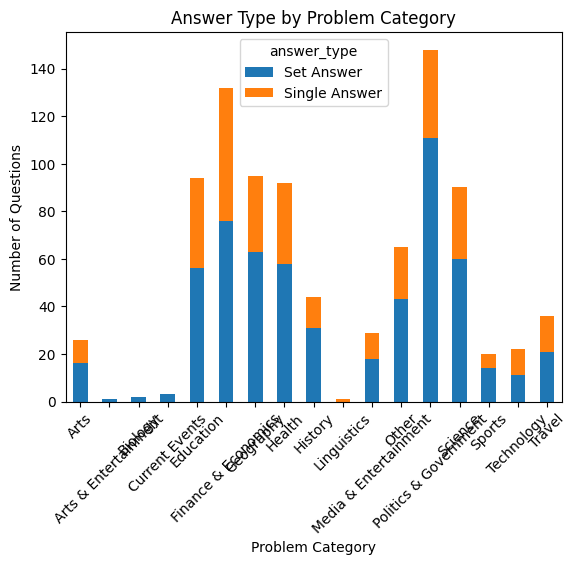

In [30]:
category_answer_type.plot(
    kind="bar",
    stacked=True
)
plt.title("Answer Type by Problem Category")
plt.xlabel("Problem Category")
plt.ylabel("Number of Questions")
plt.xticks(rotation=45)
plt.show()

## 8. Text Length Analysis (Question Complexity Proxy)
Questions Answered:

--How long are the questions?

--Which categories have more complex questions?

In [31]:
# Create question length feature
ds["question_length"] = ds["problem"].str.split().apply(len)

ds[["problem", "question_length"]].head()

,problem,question_length
0,Consider the OECD countries whose total popula...,68
1,There is a MMORPG game that was rumoured to ha...,76
2,Name the two songs that went viral on TikTok b...,37
3,I'd like you to analyze the top five universit...,53
4,Of the countries that were part of the top 10 ...,56


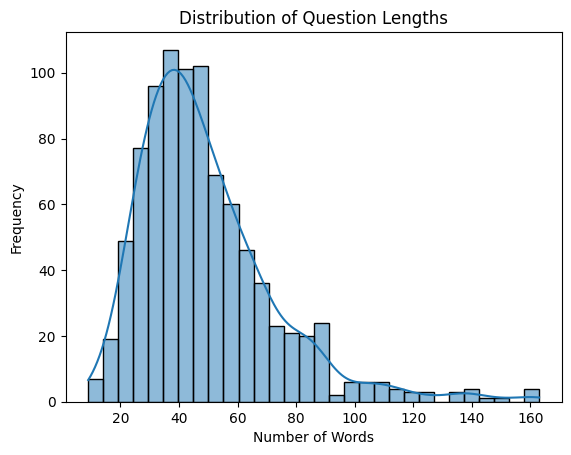

In [32]:
sns.histplot(ds["question_length"], bins=30, kde=True)
plt.title("Distribution of Question Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

## 9. Question Length by Category
Questions Answered:

--Which categories contain longer questions?

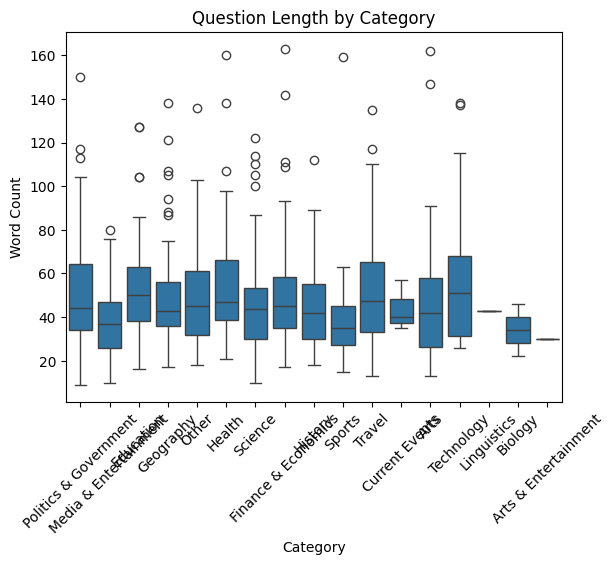

In [33]:
sns.boxplot(
    x="problem_category",
    y="question_length",
    data=ds
)
plt.xticks(rotation=45)
plt.title("Question Length by Category")
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.show()

## 10. Top 10 Longest Questions
Questions Answered:

--What are the most verbose questions?

In [34]:
top_longest = ds.sort_values(
    by="question_length",
    ascending=False
).head(10)

top_longest[["problem", "problem_category", "question_length"]]


,problem,problem_category,question_length
602,I am undertaking an analysis of the goods and ...,Finance & Economics,163
350,"On 9/28/76, the HUD Secretary (at the time) ma...",Arts,162
759,I want to study postpartum depression and spec...,Health,160
17,Find the names of the four members of the US w...,Sports,159
410,I’m interested in how firearm mortality rates ...,Politics & Government,150
519,"I'm writing a paper on war, art, and memory. S...",Arts,147
794,Look only at the SEC quarterly financial state...,Finance & Economics,142
382,I'm a University student studying the social c...,Geography,138
314,I need some information on internet penetratio...,Technology,138
348,"Stroke and colorectal cancer seem unrelated, b...",Health,138


## 11. Underrepresented Categories

Questions Answered:

--Are some domains underrepresented?

In [ ]:
least_common_categories = category_counts.tail(5)
least_common_categories


problem_category
Sports                  20
Current Events           3
Biology                  2
Linguistics              1
Arts & Entertainment     1
Name: count, dtype: int64

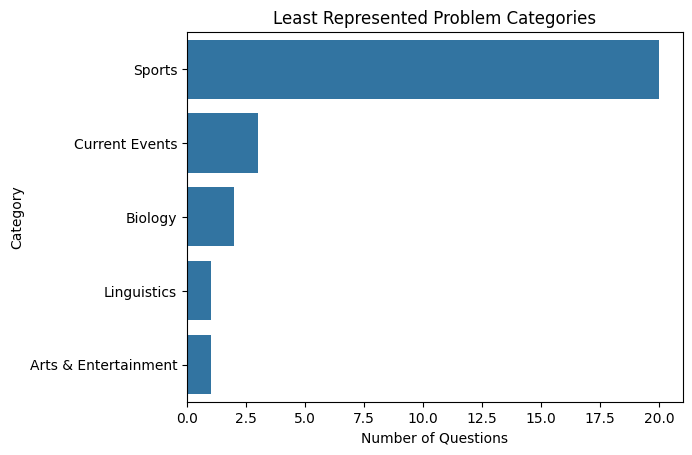

In [38]:
sns.barplot(
    y=least_common_categories.index,
    x=least_common_categories.values
)
plt.title("Least Represented Problem Categories")
plt.xlabel("Number of Questions")
plt.ylabel("Category")
plt.show()


## 12. Shortest Questions Analysis

Questions Answered:

--How short are the questions?

In [39]:
shortest_questions = ds.sort_values(
    by="question_length",
    ascending=True
).head(5)

shortest_questions[
    ["problem", "problem_category", "question_length"]
]


,problem,problem_category,question_length
88,"Which US counties voted McCain, Romney, Clinto...",Politics & Government,9
435,Which of Brazen Head Games's rpg books is the ...,Media & Entertainment,10
691,list all of the plants on the NYS Prohibited list,Science,10
313,Exhaustive list of all types of the genus Tyra...,Science,13
292,Please list all the plays by Shakespeare that ...,Arts,13


## 13. Average Question Length by Category (Complexity Comparison)


In [35]:
avg_length_by_category = (
    ds.groupby("problem_category")["question_length"]
    .mean()
    .sort_values(ascending=False)
)

avg_length_by_category

problem_category
Technology               57.500000
Health                   53.163043
Travel                   52.611111
Education                52.319149
Arts                     51.000000
Politics & Government    50.141892
Finance & Economics      49.037879
Other                    48.692308
Geography                48.178947
Science                  46.133333
History                  45.954545
Current Events           44.000000
Linguistics              43.000000
Sports                   41.800000
Media & Entertainment    39.896552
Biology                  34.000000
Arts & Entertainment     30.000000
Name: question_length, dtype: float64

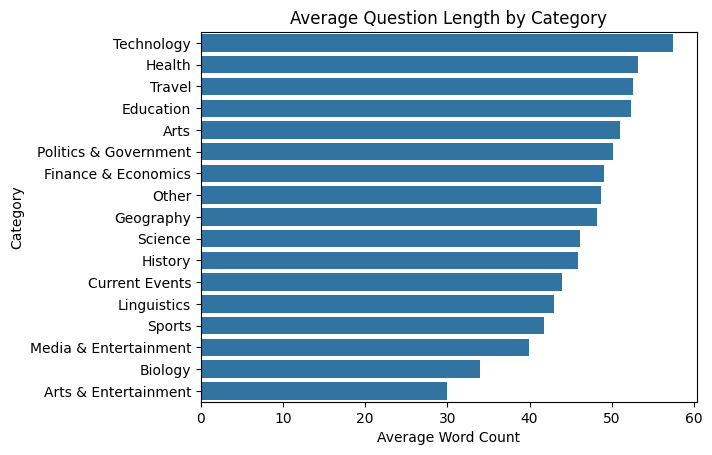

In [36]:
sns.barplot(
    y=avg_length_by_category.index,
    x=avg_length_by_category.values
)
plt.title("Average Question Length by Category")
plt.xlabel("Average Word Count")
plt.ylabel("Category")
plt.show()
